In [1]:
import numpy as np 
import astropy.units as u

from feasibgs import util as UT
from feasibgs import skymodel as Sky

import desimodel.io
import desisim.simexp

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# parameter values taken from parker's notebook https://github.com/parfa30/BOSS_SkyCont/blob/master/ModelOutput.ipynb
parker = Sky.skySpec(1.40737998, # airmass 
                 10.94289, # ecl latitude
                 41.60275, # galactic latitude
                 198.8657, # galactic longitude
                 4.86761390e+09, # tai
                 -29.38102387, # sun altitude
                 161.96666204, # sun separation
                 2.09588478, # moon phase
                 0.24935523, # moon ill
                 105.91325896, # moon sep
                 29.06037231 # moon alt
                )

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs/skymodel.py:200: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  coeffs = pd.DataFrame.from_csv(f)


In [4]:
w, Icont = parker.get_Icontinuum()

(0, 10)

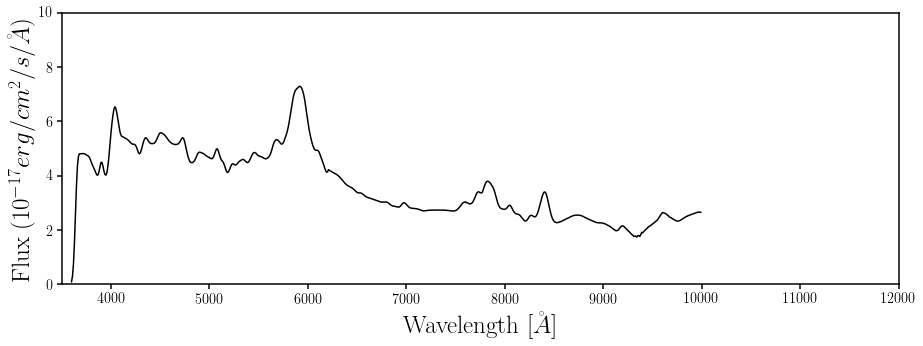

In [5]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(10.*w, Icont, c='k')
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,10)

(-1.0, 10)

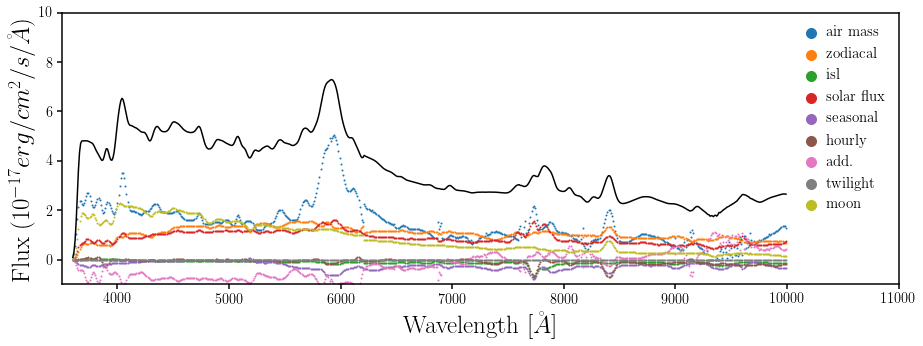

In [6]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(10.*w, Icont, c='k')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Iairmass, c='C0', s=1, label='air mass')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Izodiacal, c='C1', s=1, label='zodiacal')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Iisl, c='C2', s=1, label='isl')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Isolar_flux, c='C3', s=1, label='solar flux')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Iseasonal, c='C4', s=1, label='seasonal')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Ihourly, c='C5', s=1, label='hourly')
sub.scatter(10.*parker.coeffs['wl'], parker._dT * parker._Iadd_continuum, c='C6', s=1, label='add.')
sub.scatter(10.*parker.coeffs['wl'], parker._Itwilight, c='C7', s=1, label='twilight')

sub.scatter(10.*parker.coeffs['wl'], parker._Imoon, c='C8', s=1, label='moon')

sub.legend(loc='upper right', markerscale=10, handletextpad=0., fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.1e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(-1.,10)

In [7]:
# ccd wavelength limit 
params = desimodel.io.load_desiparams() 
wavemin = params['ccd']['b']['wavemin']
wavemax = params['ccd']['z']['wavemax']
print('%f < lambda < %f' % (wavemin, wavemax))

waves = np.linspace(wavemin, wavemax, 1e4) * u.angstrom
config = desisim.simexp._specsim_config_for_wave((waves).to('Angstrom').value, specsim_config_file='desi')

3533.000000 < lambda < 9913.000000


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  import sys


In [8]:
config.verbose = True
surface_brightness_dict = config.load_table(config.atmosphere.sky, 'surface_brightness', as_dict=True)

Loaded 65000 rows from /Volumes/chang_eHDD/projects/desi/data/spectra/spec-sky.dat with args {'format': 'ascii'}
Loaded 65000 rows from /Volumes/chang_eHDD/projects/desi/data/spectra/spec-sky-bright.dat with args {'format': 'ascii'}
Loaded 65000 rows from /Volumes/chang_eHDD/projects/desi/data/spectra/spec-sky-grey.dat with args {'format': 'ascii'}


(-1.0, 10)

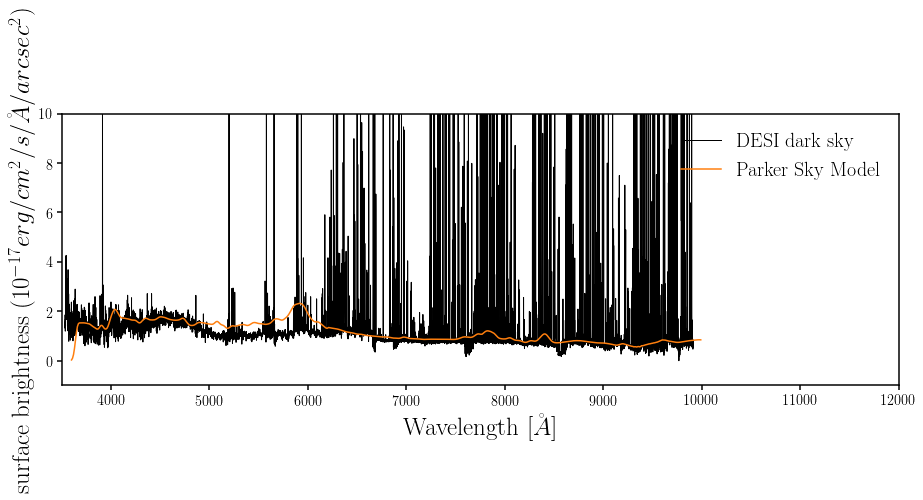

In [9]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(config.wavelength, surface_brightness_dict['dark'].value, c='k', lw=1, label='DESI dark sky')
sub.plot(10.*w, Icont/np.pi, c='C1', label='Parker Sky Model')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim(-1.,10)

7.249028013091476
7.249028013091476
7.249028013091476
7.249028013091476
7.249028013091476
7.249028013091476
-2.030511222002909
-2.0332151478173053
-1.997887850541718
-1.9245293301761475


(0, 20)

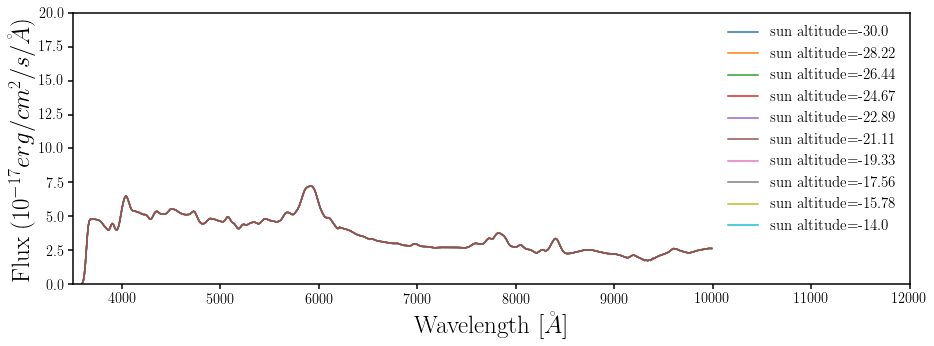

In [27]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for alt in np.linspace(-30., -14., 10):
    parker = Sky.skySpec(1.4, # airmass 
                     10.94289, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     alt, # sun altitude
                     161.96666204, # sun separation
                     2.09588478, # moon phase
                     0.24935523, # moon ill
                     105.91325896, # moon sep
                     29.06037231 # moon alt
                    )
    w, Icont = parker.get_Icontinuum()
    print Icont.max()

    sub.plot(10.*w, Icont, label='sun altitude='+str(round(alt,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim([0,20])

(0, 10)

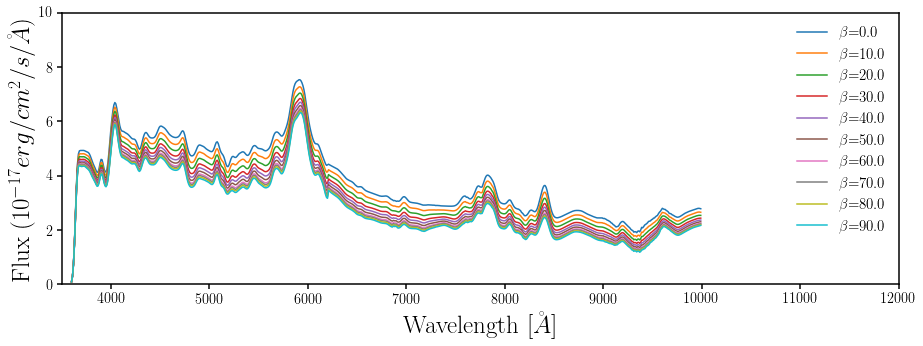

In [11]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for ecl in np.linspace(0., 90., 10):
    parker = Sky.skySpec(1.4, # airmass 
                     ecl, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     -29.38102387, # sun altitude
                     161.96666204, # sun separation
                     2.09588478, # moon phase
                     0.24935523, # moon ill
                     105.91325896, # moon sep
                     29.06037231 # moon alt
                    )
    w, Icont = parker.get_Icontinuum()

    sub.plot(10.*w, Icont, label=r'$\beta$='+str(round(ecl,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,10)

(0, 10)

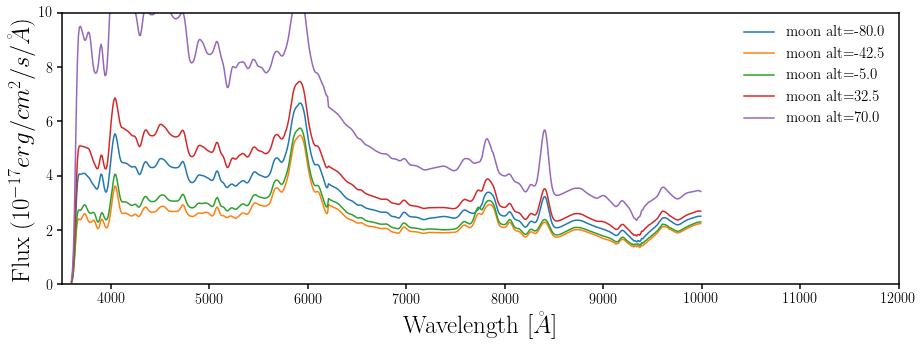

In [34]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for alt in np.linspace(-80., 70., 5):
    parker = Sky.skySpec(1.4, # airmass 
                     10.94289, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     -29.38102387, # sun altitude
                     161.96666204, # sun separation
                     2.09588478, # moon phase
                     0.24935523, # moon ill
                     105.91325896, # moon sep
                     alt # moon alt
                    )
    w, Icont = parker.get_Icontinuum()

    sub.plot(10.*w, Icont, label=r'moon alt='+str(round(alt,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,10)

(0, 40)

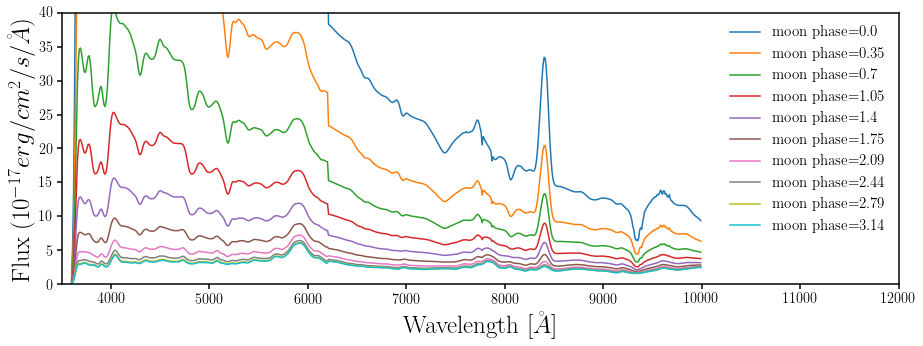

In [21]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for ph in np.linspace(0, np.pi, 10):
    parker = Sky.skySpec(1.4, # airmass 
                     10.94289, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     -29.38102387, # sun altitude
                     161.96666204, # sun separation
                     ph, # moon phase
                     0.24935523, # moon ill
                     105.91325896, # moon sep
                     29.06037231 # moon alt
                    )
    w, Icont = parker.get_Icontinuum()

    sub.plot(10.*w, Icont, label=r'moon phase='+str(round(ph,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,40)

(0, 10)

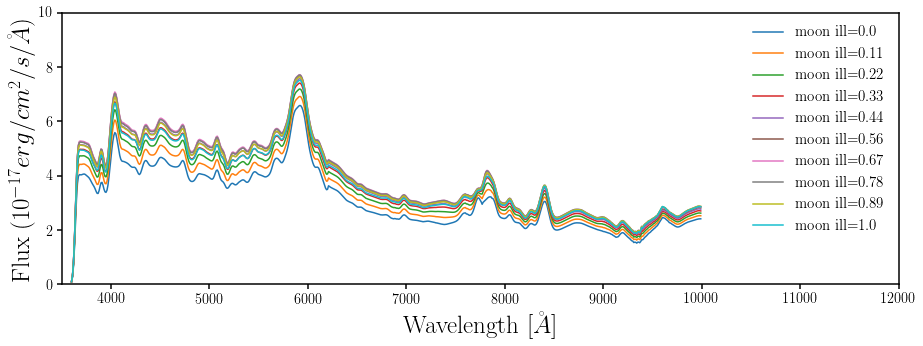

In [30]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for il in np.linspace(0, 1, 10):
    parker = Sky.skySpec(1.4, # airmass 
                     10.94289, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     -29.38102387, # sun altitude
                     161.96666204, # sun separation
                     2.09588478, # moon phase
                     il, # moon ill
                     105.91325896, # moon sep
                     29.06037231 # moon alt
                    )
    w, Icont = parker.get_Icontinuum()

    sub.plot(10.*w, Icont, label=r'moon ill='+str(round(il,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,10)

(0, 10)

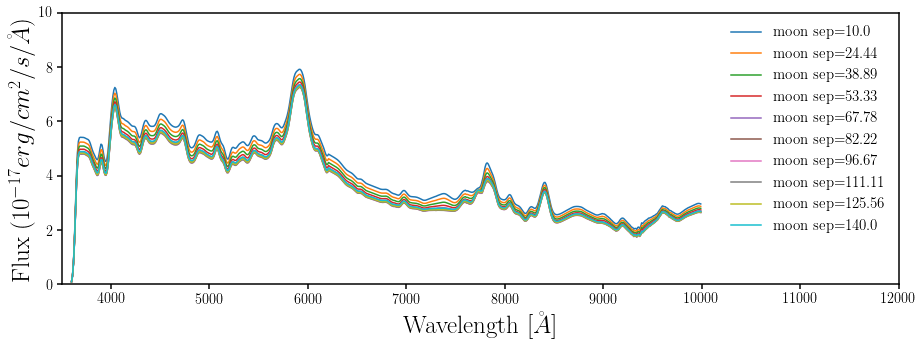

In [32]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for sep in np.linspace(10, 140, 10):
    parker = Sky.skySpec(1.4, # airmass 
                     10.94289, # ecl latitude
                     41.60275, # galactic latitude
                     198.8657, # galactic longitude
                     4.86761390e+09, # tai
                     -29.38102387, # sun altitude
                     161.96666204, # sun separation
                     2.09588478, # moon phase
                     0.24935523, # moon ill
                     sep, # moon sep
                     29.06037231 # moon alt
                    )
    w, Icont = parker.get_Icontinuum()

    sub.plot(10.*w, Icont, label=r'moon sep='+str(round(sep,2)))
sub.legend(loc='upper right', fontsize=15)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.2e4])
sub.set_ylabel(r"Flux ($10^{-17} erg/cm^{2}/s/\AA$)", fontsize=25)
sub.set_ylim(0,10)